In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from defectlib import maybe_pickle

In [10]:
defect_dict = load_tensors_all('./defect_tensors_D10/SH0401/', width=128)

(286, 408, 598)
(19, 408, 598)
(57, 408, 598)
(18, 408, 598)
(63, 634, 421)
(4, 634, 421)
(15, 634, 421)
(5, 634, 421)


In [11]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 467
number of class 0: 349
	number of SN: 15
number of class 1: 72
	number of SN: 1
number of class 6: 23
	number of SN: 3
number of class 7: 23
	number of SN: 1


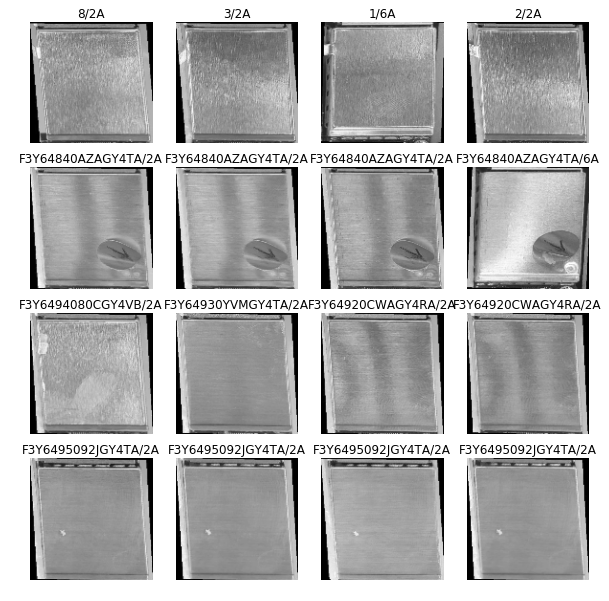

In [12]:
display_tensor(tensors, labels, sns)

In [8]:
from defectlib import GroupKFold_modeling

In [9]:
sns

array(['3/6A', 'F3Y649501G4H3RPA/2A', 'F3Y64930RR4H3RNA/2A', '4/6A',
       '0/6A', 'F3Y649501CAH3RPA/6A', 'F3Y64940N8DH3RPA/6A',
       'F3Y64930RR4H3RNA/2A', '1/2A', '14/6A', '14/6A',
       'F3Y64930RR4H3RNA/2A', 'F3Y649408PFH3RNA/2A', '7/6A',
       'F3Y649501CAH3RPA/2A', '1/2A', 'F3Y649409EAH3RNA/6A', '1/2A',
       'F3Y649501G4H3RPA/2A', 'F3Y64950PLHH3RPA/2A', 'F3Y64930RR4H3RNA/6A',
       'F3Y64950PLHH3RPA/6A', 'F3Y64750DCRH3RPA/2A', 'F3Y649501G4H3RPA/6A',
       'F3Y64950PLHH3RPA/2A', '0/2A', '1/6A', 'F3Y649409EAH3RNA/2A',
       'F3Y649409EAH3RNA/2A', 'F3Y649408PFH3RNA/2A', 'F3Y64951WJNH3RPA/2A',
       'F3Y649501CAH3RPA/6A', 'F3Y64750DCRH3RPA/2A', 'F3Y649501G4H3RPA/2A',
       '8/6A', '7/6A', '1/2A', '4/6A', 'F3Y649408PFH3RNA/6A',
       'F3Y649409EAH3RNA/2A', 'F3Y64930RR4H3RNA/2A', 'F3Y649501CAH3RPA/2A',
       '0/2A', 'F3Y649501G4H3RPA/2A', 'F3Y64930RR4H3RNA/2A',
       'F3Y64951WJNH3RPA/6A', 'F3Y64750DCRH3RPA/2A', 'F3Y64750DCRH3RPA/6A',
       'F3Y649501CAH3RPA/2A', 'F3Y64

In [10]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=8, nb_epoch=10, input_shape=(128, 128))

Model 1
the label of validation image: 4
the s/n of validation image: F3Y64951WJNH3RPA
Train on 254 samples, validate on 14 samples
Epoch 1/10
254/254 [==============================] - 4s - loss: 1.3936 - acc: 0.5630 - val_loss: 2.4742 - val_acc: 0.0000e+00
Epoch 2/10
254/254 [==============================] - 4s - loss: 0.7210 - acc: 0.7520 - val_loss: 0.4211 - val_acc: 1.0000
Epoch 3/10
254/254 [==============================] - 4s - loss: 0.3983 - acc: 0.8465 - val_loss: 0.1897 - val_acc: 1.0000
Epoch 4/10
254/254 [==============================] - 4s - loss: 0.2544 - acc: 0.8937 - val_loss: 0.0233 - val_acc: 1.0000
Epoch 5/10
254/254 [==============================] - 4s - loss: 0.1487 - acc: 0.9370 - val_loss: 0.0539 - val_acc: 1.0000
Epoch 6/10
254/254 [==============================] - 4s - loss: 0.1089 - acc: 0.9764 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 7/10
254/254 [==============================] - 4s - loss: 0.0882 - acc: 0.9764 - val_loss: 0.0804 - val_acc: 1.0000
Epo

In [12]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '1', 1.0, 1.0),
 (0, '0', 1.0, 1.0),
 (0, '12', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (0, '13', 1.0, 1.0),
 (0, '14', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '9', 1.0, 1.0),
 (0, '11', 1.0, 1.0),
 (0, '10', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (4, 'F3Y64951WJNH3RPA', 1.0, 0.0),
 (4, 'F3Y64950PLHH3RPA', 1.0, 0.0),
 (4, 'F3Y64930RR4H3RNA', 1.0, 0.0),
 (4, 'F3Y649501G4H3RPA', 0.0, 0.0),
 (7, 'F3Y649408PFH3RNA', 1.0, 0.0),
 (7, 'F3Y64750DCRH3RPA', 0.92307692307692313, 0.07692307692307693),
 (7, 'F3Y649501CAH3RPA', 0.23076923076923078, 0.0),
 (7, 'F3Y649409EAH3RNA', 1.0, 0.0),
 (7, 'F3Y64940N8DH3RPA', 1.0, 0.0)]

In [13]:
for label in set([x[0] for x in accuracy_escape_list]):
    accuracy_result = [x[2] for x in accuracy_escape_list if x[0] == label]
    accuracy_result.sort(reverse=True)
    accuracy_final = np.array(accuracy_result)
    escape_tight = 1 - accuracy_final
    escape_result = [x[3] for x in accuracy_escape_list if x[0] == label]
    escape_result.sort()
    escape_final = np.array(escape_result)
    escape_rough = escape_final
    print 'Result for label {}'.format(label)
    print escape_tight
    print escape_rough
    print "\tPick 1 test"
    print '\t\tTight Escape rate: {}'.format(escape_tight[0])
    print '\t\tRough Escape rate: {}'.format(escape_rough[0])
    print "\tPick 2 test"
    print "\t\tTight Escape rate: {}".format((escape_tight[0] + escape_tight[1]) / 2)
    print "\t\trough Escape rate: {}".format((escape_rough[0] + escape_rough[1]) / 2)

Result for label 0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 1.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 1.0
Result for label 4
[ 0.  0.  0.  1.]
[ 0.  0.  0.  0.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
Result for label 7
[ 0.          0.          0.          0.07692308  0.76923077]
[ 0.          0.          0.          0.          0.07692308]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0


In [2]:
models

NameError: name 'models' is not defined